In [1]:
import numpy as np
import datetime
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
#methods and logic of the algo is from the course materials which presented
#on class and uploaded on Canvas for reviewing. I have not and will not copy from internet or classmates' work. 
#I will cite every source.
#I guarantee the code is my own work and I totally understand the code, and it will not be copied by anyone.
#Based on my understanding of the code and lecture material, I can reproduce the code and algo without any help.
#I agree to the terms in Honor Code.

![681e662c4a15932723888c46c8c2250](681e662c4a15932723888c46c8c2250.jpg)

In [2]:
#code for 1b
random.seed(datetime.datetime.now().timestamp())
x = np.linspace(1, 10, 50)
noise = np.random.normal(0, 1, 50)
y = 5 * x + 15 + noise
for i in range(5):
    print(f"x{i+1} = {x[i]:.2f}, y{i+1} = {y[i]:.2f}")

x1 = 1.00, y1 = 20.33
x2 = 1.18, y2 = 21.59
x3 = 1.37, y3 = 23.73
x4 = 1.55, y4 = 21.88
x5 = 1.73, y5 = 22.74


the intercep is: [15.18511462]

the slope is: [5.01055378]

SSE = 41.547731596200784


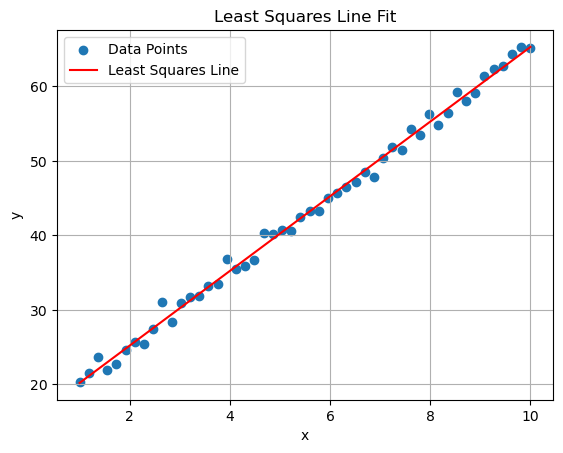

In [3]:
#code for 1c
#algo and method from OLS_Example2.ipynb from class material
y_t = 5 * x + 15
x_v = x[:,np.newaxis]  #turn x into a column vector
x1 = np.ones(len(x))
x1 = x1[:,np.newaxis]  #create a column vector with all 1s

X = np.hstack([x1,x_v])  #this is the design matrix

y_v = y[:, np.newaxis] #turn y into a column vector

###estimate the weights using the closed-form solution formula
X_T = X.transpose()
X_T_X = np.matmul(X_T, X)
X_T_y = np.matmul(X_T, y_v)
W = np.matmul(np.linalg.inv(X_T_X), X_T_y)

y_hat = W[0]+x*W[1]  # the predictions for the inputs

res = y_hat - y      # the residule
SSE = np.inner(res,res)  # the sum of squared error of the fitted linear squared line

print("the intercep is: {}\n".format(W[0]))
print("the slope is: {}\n".format(W[1]))
print("SSE = {}".format(SSE))

plt.scatter(x, y, label="Data Points")
plt.plot(x, y_hat, color='red', label="Least Squares Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Least Squares Line Fit")
plt.grid(True)
plt.show()

the intercep is: 15.185114622382248

the slope is: [5.01055378]

SSE = 41.54773159620071


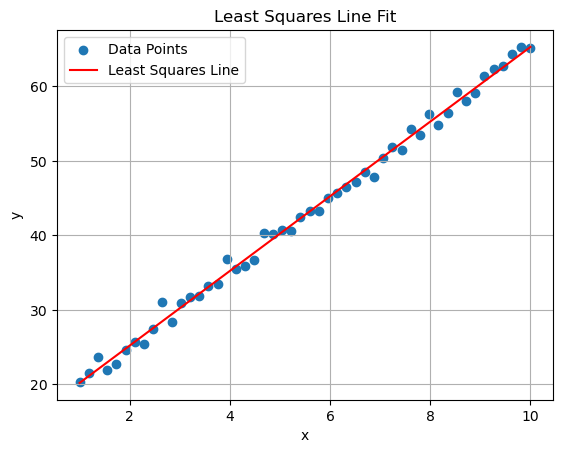

In [4]:
#code for 1d
x_m = x.reshape(-1, 1)
lrg = linear_model.LinearRegression()  # create a linear regression object 
lrg.fit(x_m,y)                         # fit the linear model using the synthetic data set
y_hat = lrg.predict(x_m)               # make prediction on the inputs using the fitted linear regression model

SSE = mean_squared_error(y,y_hat)* 50  # the sum of squared error of the fitted linear squared line

print("the intercep is: {}\n".format(lrg.intercept_))
print("the slope is: {}\n".format(lrg.coef_))
print("SSE = {}".format(SSE))

plt.scatter(x, y, label="Data Points")
plt.plot(x, y_hat, color='red', label="Least Squares Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Least Squares Line Fit")
plt.grid(True)
plt.show()

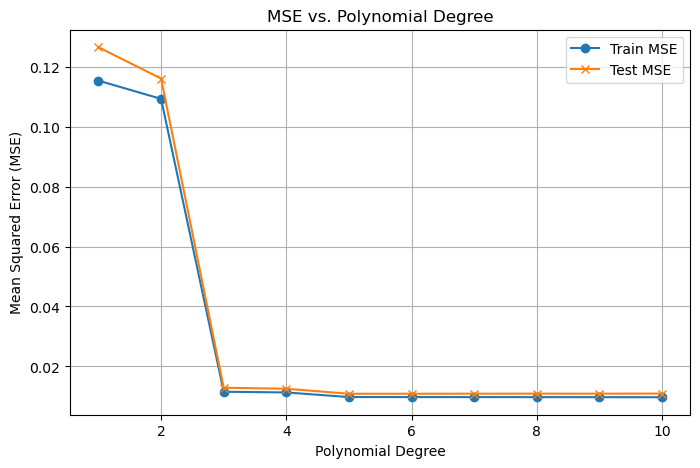

[0.1153434894150429, 0.10926595250954771, 0.011554239383228521, 0.011315805224235533, 0.0097750439055769, 0.009769861940493, 0.009757584401992179, 0.009751647148570885, 0.009742540045833047, 0.009724138348679695]


In [5]:
#code for 2a
#algo and method from PS2_Polynomial_&_Ridge_Regression.ipynb from class material
def linear_regression(X_train, y_train, X_test, y_test, power, models_to_plot):
    # Use PolynomialFeatures and pipeline to fit data
    poly_features = PolynomialFeatures(degree=power)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features", poly_features), ("linear_regression", lrg)])
    lrg.fit(poly_features.fit_transform(X_train), y_train)

    # Get predictions with the model trained with the pipeline
    pred_train = lrg.predict(poly_features.fit_transform(X_train))
    pred_test = lrg.predict(poly_features.fit_transform(X_test))

    # Calculate MSE
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)
    # Plot if specified in models_to_plot
    return train_mse, test_mse, lrg.coef_

# Generate synthetic 2-D dataset
random.seed(datetime.datetime.now().timestamp())
data_range = 100
x1 = np.linspace(0, 1, data_range)
x2 = np.linspace(0, 1, data_range)
x1, x2 = np.meshgrid(x1, x2)
y = np.sin(x1 + 5 * x2) + np.random.normal(0, 0.1, (data_range, data_range))

x1_flat = x1.flatten()
x2_flat = x2.flatten()
y_flat = y.flatten()

X_train, X_test, y_train, y_test = train_test_split(np.column_stack((x1_flat, x2_flat)), y_flat, test_size=0.2, random_state=42)

models_to_plot = {1: 321, 3: 322, 6: 323, 9: 324}

train_mse_values = []
test_mse_values = []
weights = []

col = ['train_mse','test_mse', 'train_rss','test_rss'] + ['w%d'%i for i in range(16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

for degree in range(1, 11):
    train_mse, test_mse, weight = linear_regression(X_train, y_train, X_test, y_test, degree, models_to_plot)
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)

plt.figure(figsize=(8, 5))
degrees = range(1, 11)
plt.plot(degrees, train_mse_values, label='Train MSE', marker='o')
plt.plot(degrees, test_mse_values, label='Test MSE', marker='x')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

print(train_mse_values)

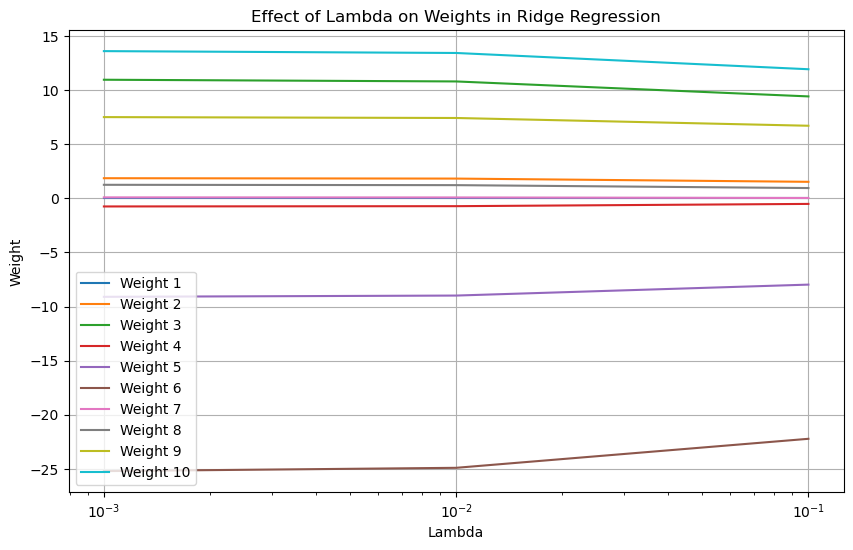

In [6]:
#code for 2b
#algo and method from PS2_Polynomial_&_Ridge_Regression.ipynb from class material
def ridge_regression(X_train, y_train, X_test, y_test, _lambda, models_to_plot):
    # Use PolynomialFeatures and pipeline to fit data
    poly_features = PolynomialFeatures(degree=3)
    ridge = Ridge(alpha=_lambda)  
    pipeline = Pipeline([("polynomial_features", poly_features), ("linear_regression", ridge)])
    pipeline.fit(X_train, y_train)

    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    return train_mse, test_mse, pipeline.steps[1][1].coef_

train_mse_values = []
test_mse_values = []

_lambda = [0.1, 0.01, 0.001]

weights = []
for i in _lambda:
    train_mse_values, test_mse_values, weight = ridge_regression(X_train, y_train, X_test, y_test, i, {})
    weights.append(weight)

weights = np.array(weights)
plt.figure(figsize=(10, 6))
for i in range(weights.shape[1]):
    plt.plot(_lambda, weights[:, i], label=f'Weight {i + 1}')

plt.xlabel('Lambda')
plt.ylabel('Weight')
plt.title('Effect of Lambda on Weights in Ridge Regression')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Using a logarithmic scale for lambda values
plt.show()

#The lambda controls the coef, the coef (weights) shrinks to 0 when we increasing the lambda. The result
#is that we may lose the influence of the feature.

The lambda controls the coef, the coef (weights) shrinks to 0 when we increasing the lambda. The result
is that we may lose the influence of the feature.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.699e+00, tolerance: 4.673e-01
  model = cd_fast.enet_coordinate_descent(


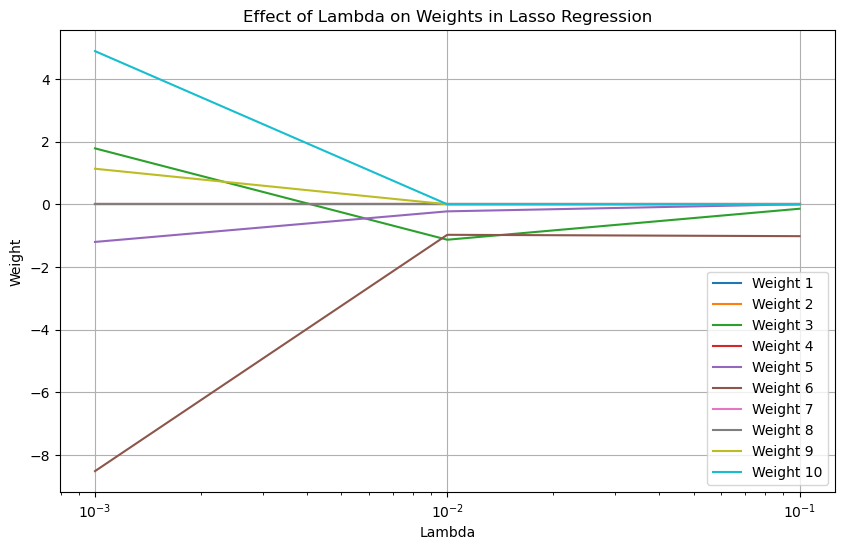

In [7]:
#code for 2c
from sklearn.linear_model import Lasso
def lasso_regression(X_train, y_train, X_test, y_test, _lambda, models_to_plot):
    # Use PolynomialFeatures and pipeline to fit data
    poly_features = PolynomialFeatures(degree=3)
    lasso = Lasso(alpha=_lambda)  
    pipeline = Pipeline([("polynomial_features", poly_features), ("linear_regression", lasso)])
    pipeline.fit(X_train, y_train)

    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    return train_mse, test_mse, pipeline.steps[1][1].coef_

train_mse_values = []
test_mse_values = []

_lambda = [0.1, 0.01, 0.001]

weights = []
for i in _lambda:
    train_mse_values, test_mse_values, weight = lasso_regression(X_train, y_train, X_test, y_test, i, {})
    weights.append(weight)

weights = np.array(weights)
plt.figure(figsize=(10, 6))
for i in range(weights.shape[1]):
    plt.plot(_lambda, weights[:, i], label=f'Weight {i + 1}')

plt.xlabel('Lambda')
plt.ylabel('Weight')
plt.title('Effect of Lambda on Weights in Lasso Regression')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Using a logarithmic scale for lambda values
plt.show()
#Same as Ridge, Lasso's weights will also shrink to 0 as the lambda increases. However, the weights
#lasso will become 0 exactly which completely remove the influence of feature.
#They both techniques of linear regression by adding penalty to least squares loss function. However,
#Lasso focus L1-norm regularization. They both need to control the number of lambda to prevent the bias
#and variance increase.

Same as Ridge, Lasso's weights will also shrink to 0 as the lambda increases. However, the weights lasso will become 0 exactly which completely remove the influence of feature.They both techniques of linear regression by adding penalty to least squares loss function. However, Lasso focus L1-norm regularization. They both need to control the number of lambda to prevent the bias
and variance increase.

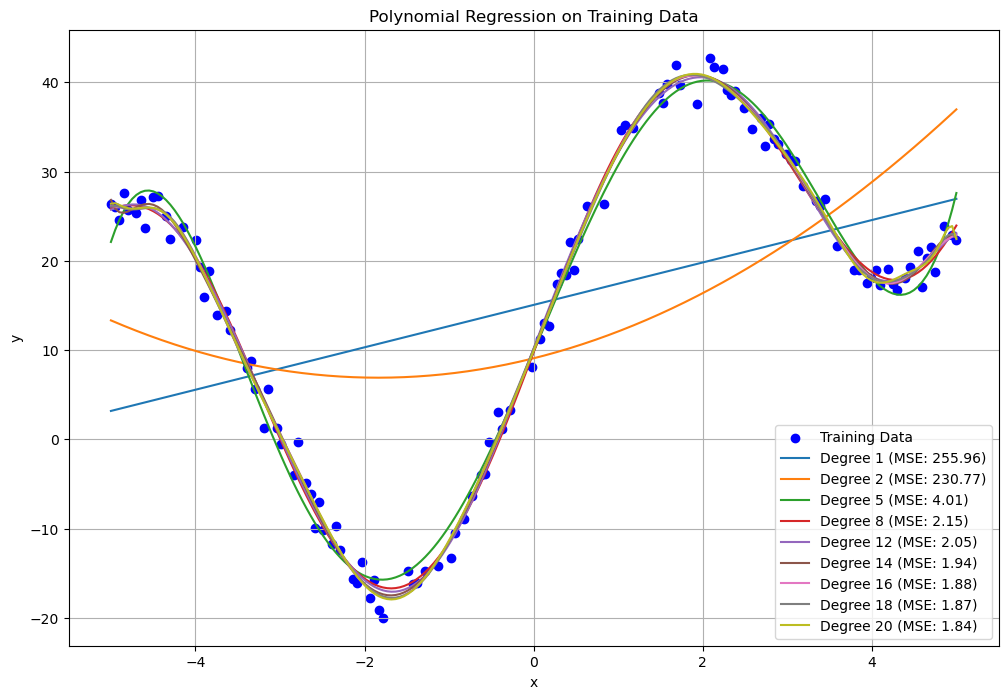

The most optimal degree is 8 at Test MSE: 2.79 and Train MSE: 1.84


In [8]:
#code for 3a and 3b

def linear_regression(X_train, y_train, X_test, y_test, power, models_to_plot):
    poly_features = PolynomialFeatures(degree=power)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features", poly_features), ("linear_regression", lrg)])
    lrg.fit(poly_features.fit_transform(X_train), y_train)

    pred_train = lrg.predict(poly_features.fit_transform(X_train))
    pred_test = lrg.predict(poly_features.fit_transform(X_test))

    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)
    X_plot = np.linspace(-5, 5, 200)
    X_plot_poly = poly_features.transform(X_plot.reshape(-1, 1))
    y_plot_pred = lrg.predict(X_plot_poly)
    plt.plot(X_plot, y_plot_pred, label=f'Degree {degree} (MSE: {train_mse:.2f})')
    return train_mse, test_mse, lrg.coef_

random.seed(datetime.datetime.now().timestamp())

x = np.linspace(-5, 5, 200)

y_target = 22 * np.sin(x) + 0.6 * x**2 + 4 * x + 10
noise = np.random.normal(0, 1.5, len(x))
y_noisy = y_target + noise

X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y_noisy, test_size=0.4, random_state=42)

degrees = [1, 2, 5, 8, 12, 14, 16, 18, 20]
train_mse_values = []
test_mse_values = []
weights = []

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, label='Training Data', marker='o', color='b')

for degree in degrees:
    train_mse, test_mse, weight = linear_regression(X_train, y_train, X_test, y_test, degree, {})
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    weights.append(weights)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression on Training Data')
plt.legend()
plt.grid(True)
plt.show()

best_degree = degrees[np.argmin(test_mse_values)]
print(f"The most optimal degree is {best_degree} at Test MSE: {min(test_mse_values):.2f} and Train MSE: {min(train_mse_values):.2f}")

From the graph(a little) and code, we can easily see that 8 degree is the most optimal. 1-7 degree are
too under-fitting that errors are too high. However, when degree goes beyond 8, the models becomes over fitting. However, 8 degree can also cause an over or under-fitting. We should always adjust the value as we need.

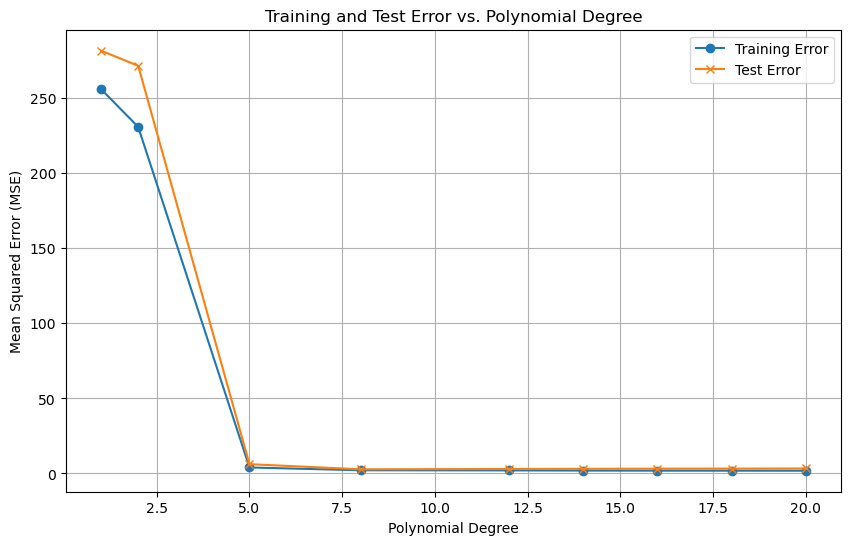

In [9]:
#code for 3c
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse_values, label='Training Error', marker='o')
plt.plot(degrees, test_mse_values, label='Test Error', marker='x')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Test Error vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

ALthough the graph did not shows pretty clear. But we can still see that when degree at 8. The model has the "perfect" fitting. When model has under-fitting, the errors are too big that we can ignore directly. However, when degrees are too high then the model will become over-fitting that test error will higher than training error by much. We should always looking for the best one for our model.